In [1]:
import pyarrow.parquet as pq
import pandas as pd
from clustergram import Clustergram
import sklearn
import cudf
import matplotlib.pyplot as plt
import pickle



In [2]:
df = cudf.read_parquet('/rapids/my_data/usa.bg.cc.parquet')

In [3]:
df

,GEOID,Male_Under_5_years,Male_5_to_9_years,Male_10_to_14_years,Male_15_to_17_years,Male_20_years,Male_21_years,Male_22_to_24_years,Male_25_to_29_years,Male_30_to_34_years,...,Tablet_or_other_portable_wireless_computer_with_no_other_type_of_computing_device,No_Computer,Dial_up_with_no_other_type_of_Internet_subscription,Cellular_data_plan_with_no_other_type_of_Internet_subscription,Broadband_such_as_cable_fiber_optic_or_DSL_with_no_other_type_of_Internet_subscription,Satellite_Internet_service,Internet_access_without_a_subscription,No_Internet_access,Under_18_With_a_broadband_Internet_subscription,Under_18_Without_an_Internet_subscription
0,020130001001,-3.955508,-6.000000,-6.000000,-5.763099,-4.455404,-6.000000,-3.057724,-2.303734,-2.705826,...,-3.423176,-2.197225,-6.000000,-3.263576,-3.001272,-2.386467,-3.610918,0.748939,-2.348726,-2.926739
1,020130001002,-3.458307,-3.514030,-3.283414,-4.406719,-4.720121,-6.000000,-3.485803,-3.173878,-3.736026,...,-3.964886,-1.584120,-6.000000,-3.708137,-2.519998,-2.559235,-3.252587,-0.522189,-1.785746,-2.477098
2,020130001003,-4.357563,-4.583265,-3.553615,-4.015954,-6.000000,-6.000000,-4.117753,-2.949777,-3.355153,...,-6.000000,-2.534720,-6.000000,-3.946424,-2.765060,-1.291259,-2.949439,-1.079744,-2.039596,-2.854082
3,020160001001,-3.263576,-3.652820,-3.324600,-3.048942,-3.946961,-4.649719,-5.465948,-3.001272,-2.770354,...,-4.590057,-2.436897,-6.000000,-1.986732,-2.746202,-2.308125,-3.311585,-1.318576,-1.203973,-2.877949
4,020160002001,-3.900909,-4.014261,-4.108226,-4.455932,-5.474893,-4.912130,-3.874401,-2.964944,-3.120895,...,-6.000000,-3.206803,-5.545177,-1.751486,-3.504556,-1.691018,-3.206803,-2.005018,-1.781771,-3.900625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236770,560459511001,-3.134890,-3.359537,-3.209880,-4.105591,-6.000000,-6.000000,-3.969702,-3.164269,-4.002041,...,-4.153661,-2.018559,-6.000000,-0.633800,-2.264897,-2.613117,-4.338597,-1.548813,-1.176574,-5.370056
236771,560459511002,-4.940343,-3.891162,-4.501116,-6.000000,-3.532359,-6.000000,-4.697228,-4.287193,-2.871452,...,-6.000000,-1.514128,-6.000000,-2.997455,-1.386294,-1.995539,-2.961831,-1.427794,-2.514836,-3.665963
236772,560459513001,-2.661693,-2.393339,-6.000000,-3.173704,-6.000000,-6.000000,-6.000000,-2.689457,-2.661693,...,-6.000000,-2.224072,-6.000000,-0.723179,-2.179642,-2.654095,-1.787119,-1.755058,-1.023043,-6.000000
236773,560459513002,-4.680706,-3.266200,-6.000000,-3.590076,-6.000000,-6.000000,-3.226991,-3.189153,-3.082945,...,-6.000000,-3.512540,-6.000000,-1.345764,-1.417966,-3.164068,-1.369487,-3.214868,-1.457516,-6.000000


In [3]:
df = df.set_index('GEOID')

In [ ]:
cgram = Clustergram(range(1, 8), backend='cuML',n_init=10)

In [ ]:
cgram.fit(df)

In [4]:
cgram = Clustergram(range(1, 15), backend='sklearn',n_init=1000)

In [5]:
df2= df.to_pandas()

In [6]:
cgram.fit(df2)

K=1 skipped. Mean computed from data directly.
K=2 fitted in 624.1078844070435 seconds.
K=3 fitted in 768.0287110805511 seconds.
K=4 fitted in 1193.8481090068817 seconds.
K=5 fitted in 1594.3408336639404 seconds.
K=6 fitted in 2027.1264975070953 seconds.
K=7 fitted in 2784.436142206192 seconds.
K=8 fitted in 3633.233123064041 seconds.
K=9 fitted in 3714.8414709568024 seconds.
K=10 fitted in 3625.576372385025 seconds.
K=11 fitted in 3650.1967945098877 seconds.
K=12 fitted in 4085.7289872169495 seconds.
K=13 fitted in 4497.060854434967 seconds.
K=14 fitted in 4912.866227149963 seconds.


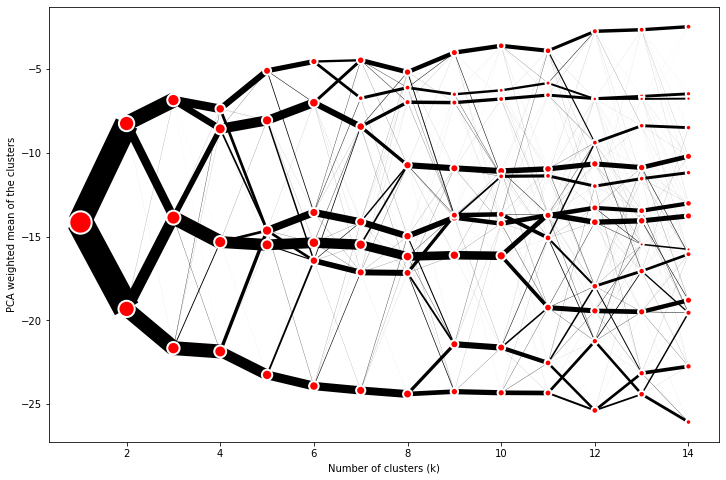

In [7]:
cgram.plot(figsize=(12, 8))
plt.savefig('../clustergram.pdf')

In [8]:
with open('../data/clustergram.pickle','wb') as f:
    pickle.dump(cgram, f)